In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Para gráficos
import scipy.stats as stats     # Para calcular funciones de densidad
from scipy.integrate import quad as quad # Para calcular las integrales debajo del grafico densidad


Ejercicio 3.32 pagina 118:

Suponga que 20% de todos los ejemplares de un libro de texto particular no pasan una
prueba de resistencia de encuadernación. Sea X el número entre 15 ejemplares seleccionados
al azar que no pasan la prueba. Entonces X tiene una distribución binomial con
n = 15 y p = .2. 

la probabilidad de obtener al menos 8 que no pasen la prueba es de: 0.999175
la probabilidad de obtener 8 que no pasen la prueba es de: 0.0034330000000000194
la probabilidad de obtener mas de 8 que no pasen la prueba es de: 0.004257999999999984
la probabilidad de obtener entre 4 y 7 que no pasen la prueba es de: 0.347457


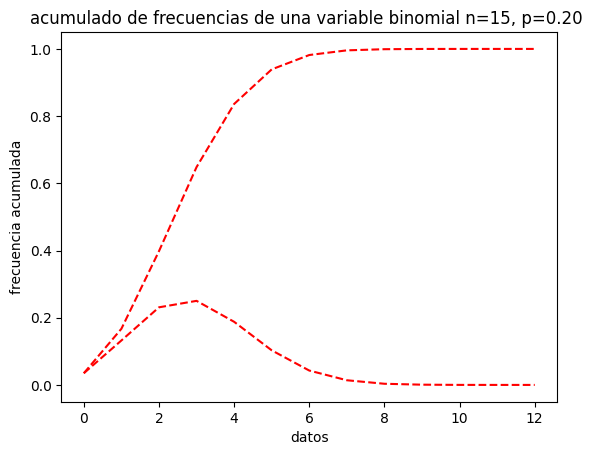

In [2]:
np.random.seed(123)
tamaño_simul=1000000
y = np.random.binomial(n=15, p=0.2, size=tamaño_simul)
y.sort()

# Obtener valores únicos y sus frecuencias
valores_unicos, frecuencias = np.unique(y, return_counts=True)
frec_acum=np.cumsum(frecuencias)/tamaño_simul
frecuencias=frecuencias/tamaño_simul

plt.plot(valores_unicos,frecuencias, color='red', linestyle='--')
plt.title('acumulado de frecuencias de una variable binomial ')
plt.xlabel('datos')
plt.ylabel('frecuencia acumulada')

plt.plot(valores_unicos,frec_acum, color='red', linestyle='--')
plt.title('acumulado de frecuencias de una variable binomial n=15, p=0.20 ')
plt.xlabel('datos')
plt.ylabel('frecuencia acumulada')

tabla_de_frecuencias = pd.DataFrame({'casos': valores_unicos, 'frecuencia': frecuencias})
tabla_de_frec_acum=pd.DataFrame({'casos': valores_unicos, 'frecuencia': frec_acum})

pregunta1=tabla_de_frecuencias[tabla_de_frecuencias['casos']<=8].sum().iloc[1].copy()
print(f"la probabilidad de obtener al menos 8 que no pasen la prueba es de: {pregunta1}")


pregunta2=tabla_de_frecuencias[tabla_de_frecuencias['casos']<=8].sum().iloc[1].copy()-tabla_de_frecuencias[tabla_de_frecuencias['casos']<=7].sum().iloc[1].copy()
print(f"la probabilidad de obtener 8 que no pasen la prueba es de: {pregunta2}")

pregunta3=1-tabla_de_frecuencias[tabla_de_frecuencias['casos']<8].sum().iloc[1].copy()
print(f"la probabilidad de obtener mas de 8 que no pasen la prueba es de: {pregunta3}")

pregunta4=tabla_de_frecuencias[tabla_de_frecuencias['casos']<=7].sum().iloc[1].copy()-tabla_de_frecuencias[tabla_de_frecuencias['casos']<4].sum().iloc[1].copy()
print(f"la probabilidad de obtener entre 4 y 7 que no pasen la prueba es de: {pregunta4}")





ejemplo 3.3 pag.119

Un fabricante de aparatos electrónicos afirma que cuando mucho 10% de sus unidades de
suministro de potencia necesitan servicio durante el periodo de garantía.

Para investigar esta afirmación, técnicos en un laboratorio de prueba adquieren 20 unidades y someten a cada una a una prueba acelerada para simular el uso durante el periodo de garantía. 

Sea "p" la probabilidad de que una unidad de suministro de potencia necesite reparación durante
el periodo (proporción de unidades que requieren reparación). 

Los técnicos de laboratorio deben decidir si los datos obtenidos con el experimento respaldan la afirmación de que . Sea X el número entre las 20 muestreadas que necesitan reparación, así que X equivale a Bin(20, p) considere la regla de decisión:

Rechazar la afirmación de que p <= 0.10 a favor de la conclusión de que p > 0.10 si x >= 5
(donde x es el valor observado de X) y considere plausible la afirmación si x <= 4.

In [3]:
np.random.seed(123)
tamaño_simul=10000
y = np.random.binomial(n=20, p=0.1, size=tamaño_simul)


# Ordeno el array
y.sort()

# Obtener valores únicos y sus frecuencias
valores_unicos, frecuencias = np.unique(y, return_counts=True)
# Obtener frecuencias acumuladas
frec_acum=np.cumsum(frecuencias)/tamaño_simul
frecuencias=(frecuencias/tamaño_simul)

tabla_de_frecuencias = pd.DataFrame({'casos': valores_unicos, 'frecuencia': frecuencias})
tabla_de_frec_acum=pd.DataFrame({'casos': valores_unicos, 'frecuencia': frec_acum})

print(f"esperanza teorica= {(20*.1)}")
print(f"esperanza de la simulación= {y.mean()}")

print(f"varianza teorica= {(20*.1*(1-.1))}")
print(f"varianza de la simulación es= {y.var()}")

print(f"desvio teorico= {(20*.1*(1-.1))**0.5}")
print(f"desvio de la simulación es= {y.var()**0.5}")

pregunta1=tabla_de_frecuencias[tabla_de_frecuencias['casos']>=5].sum().iloc[1].copy()
print(f"siendo p=0.10 la probabilidad de obtener mayor o iguales a 5 que requieran reparación es de: {pregunta1}")



tamaño_simul=1000
y = np.random.binomial(n=20, p=0.2, size=tamaño_simul)

# Ordeno el array
y.sort()

# Obtener valores únicos y sus frecuencias
valores_unicos, frecuencias = np.unique(y, return_counts=True)
# Obtener frecuencias acumuladas
frec_acum=np.cumsum(frecuencias)/tamaño_simul
frecuencias=(frecuencias/tamaño_simul)

tabla_de_frecuencias = pd.DataFrame({'casos': valores_unicos, 'frecuencia': frecuencias})
tabla_de_frec_acum=pd.DataFrame({'casos': valores_unicos, 'frecuencia': frec_acum})

pregunta1=tabla_de_frecuencias[tabla_de_frecuencias['casos']<=4].sum().iloc[1].copy()
print(f"siendo p=0.20 la probabilidad de obtener menor o iguales a 5 que requieran reparación es de: {pregunta1}")


esperanza teorica= 2.0
esperanza de la simulación= 1.9842
varianza teorica= 1.8
varianza de la simulación es= 1.75135036
desvio teorico= 1.3416407864998738
desvio de la simulación es= 1.3233859452177963
siendo p=0.10 la probabilidad de obtener mayor o iguales a 5 que requieran reparación es de: 0.041699999999999994
siendo p=0.20 la probabilidad de obtener menor o iguales a 5 que requieran reparación es de: 0.655


DISTRIBUCIÓN DE POISSON.

ejemplo 3.39 página 128

Sea X el número de criaturas de un tipo particular capturadas en una trampa durante un
lapso de tiempo dado. Suponga que X tiene una distribución de Poisson con u=4.5, así que en promedio las trampas contendrán 4.5 criaturas. [El artículo “Dispersal Dynamics ofthe Bivalve Gemma gemma in a Patchy Environment” (Ecological Monographs, 1995:
1–20) sugiere este modelo: el molusco bivalvo Gemma gemma es una pequeña almeja.] 

1_ La probabilidad de que una trampa contenga exactamente cinco criaturas es:
2_ La probabilidad de que una trampa contenga cuando mucho cinco criaturas es

esperanza teorica= 4.5
esperanza de la simulación= 4.50158
varianza teorica= 4.5
varianza de la simulación es= 4.4972775036
La probabilidad de que una trampa contenga exactamente cinco criaturas es: 0.16955
La probabilidad de que una trampa contenga cuando mucho cinco criaturas es: 0.70238


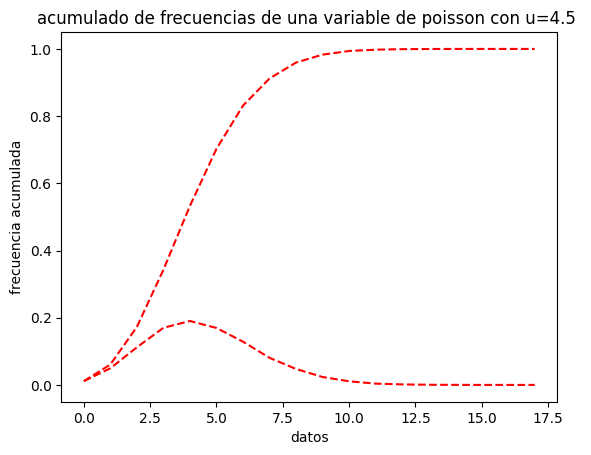

In [4]:
np.random.seed(123)
tamaño_simul=100000
y = np.random.poisson(lam=4.5, size=tamaño_simul)

# Ordeno el array
y.sort()

# Obtener valores únicos y sus frecuencias
valores_unicos, frecuencias = np.unique(y, return_counts=True)
# Obtener frecuencias acumuladas
frec_acum=np.cumsum(frecuencias)/tamaño_simul
frecuencias=(frecuencias/tamaño_simul)

plt.plot(valores_unicos,frecuencias, color='red', linestyle='--')
plt.title('frecuencias de una variable de poisson con u=4.5 ')
plt.xlabel('datos')
plt.ylabel('frecuencia')

plt.plot(valores_unicos,frec_acum, color='red', linestyle='--')
plt.title('acumulado de frecuencias de una variable de poisson con u=4.5 ')
plt.xlabel('datos')
plt.ylabel('frecuencia acumulada')
tabla_de_frecuencias = pd.DataFrame({'casos': valores_unicos, 'frecuencia': frecuencias})
tabla_de_frec_acum=pd.DataFrame({'casos': valores_unicos, 'frecuencia': frec_acum})

print(f"esperanza teorica= {(4.5)}")
print(f"esperanza de la simulación= {y.mean()}")

print(f"varianza teorica= {4.5}")
print(f"varianza de la simulación es= {y.var()}")


pregunta1=tabla_de_frecuencias[tabla_de_frecuencias['casos']==5].sum().iloc[1].copy()
print(f"La probabilidad de que una trampa contenga exactamente cinco criaturas es: {pregunta1}")

pregunta2=tabla_de_frecuencias[tabla_de_frecuencias['casos']<=5].sum().iloc[1].copy()
print(f"La probabilidad de que una trampa contenga cuando mucho cinco criaturas es: {pregunta2}")


Suponga que llegan pulsos a un contador a un ritmo promedio de seis por minuto, así que
alfa= 6. Para determinar la probabilidad de que en un intervalo de 0.5 minuto se reciba por
lo menos un pulso, obsérvese que el número de pulsos en ese intervalo tiene una distribución
de Poisson con parámetro alfa*t=6*0.50 (se utiliza .5 minuto porque a está expresada
como rapidez por minuto). Entonces con X = el número de pulsos recibidos en el
intervalo de 30 segundos

la probabilidad de que en un intervalo de 0.5 minuto se reciba por lo menos un pulso es de: 0.9498400000000001


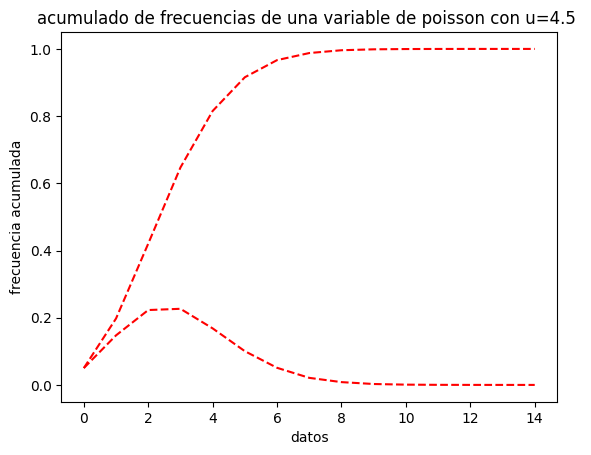

In [5]:
np.random.seed(123)
tamaño_simul=100000
y = np.random.poisson(lam=3, size=tamaño_simul)

# Ordeno el array
y.sort()

# Obtener valores únicos y sus frecuencias
valores_unicos, frecuencias = np.unique(y, return_counts=True)
# Obtener frecuencias acumuladas
frec_acum=np.cumsum(frecuencias)/tamaño_simul
frecuencias=(frecuencias/tamaño_simul)

plt.plot(valores_unicos,frecuencias, color='red', linestyle='--')
plt.title('frecuencias de una variable de poisson con u=4.5 ')
plt.xlabel('datos')
plt.ylabel('frecuencia')

plt.plot(valores_unicos,frec_acum, color='red', linestyle='--')
plt.title('acumulado de frecuencias de una variable de poisson con u=4.5 ')
plt.xlabel('datos')
plt.ylabel('frecuencia acumulada')
tabla_de_frecuencias = pd.DataFrame({'casos': valores_unicos, 'frecuencia': frecuencias})
tabla_de_frec_acum=pd.DataFrame({'casos': valores_unicos, 'frecuencia': frec_acum})

pregunta1=tabla_de_frecuencias[tabla_de_frecuencias['casos']>=1].sum().iloc[1].copy()
print(f"la probabilidad de que en un intervalo de 0.5 minuto se reciba por lo menos un pulso es de: {pregunta1}")



DISTRIBUCIÓN CONTINUA. 
DISTRIBUCIÓN NORMAL ESTÁNDAR

Ejemplo 4.13 página 154

Determínense las siguientes probabilidades normales estándar: 

(a) P(Z<=1.25)

(b) p(Z>1.25)

(c) p(Z<=-1.25)

(d) p(-0.38<=Z<=1.25)


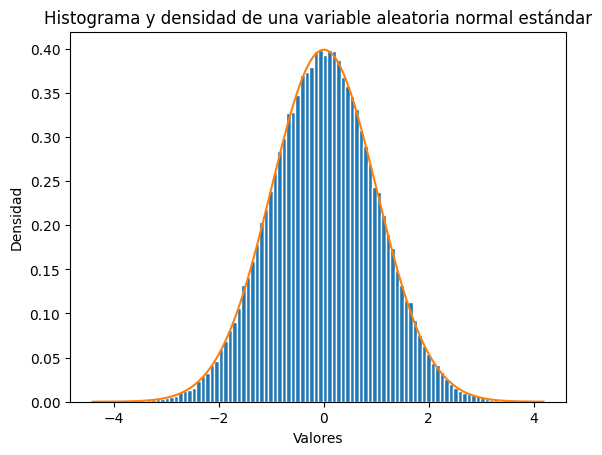

la probabilidad para cuando P(Z<=1.25) es igual a: 0.894350226333146
la probabilidad para cuando p(Z>1.25) es igual a: 0.894350226333146
la probabilidad para cuando p(Z<=-1.25) es igual a: 0.10564977366685527
la probabilidad para cuando p(-0.38<=Z<=1.25) es igual a: 0.5423775187573076


In [6]:
np.random.seed(123)
tamaño_simul=100000
sigma=1
media=0
y = np.random.normal(loc=media, scale=sigma, size=tamaño_simul)
# Ordeno el array
y.sort()
fy=stats.norm.pdf(y, loc=media, scale=sigma)

plt.hist(y, bins=100, edgecolor = "white", density=True)
plt.plot(y, fy)
plt.ylabel('Densidad')
plt.xlabel('Valores')
plt.title('Histograma y densidad de una variable aleatoria normal estándar')
plt.show()

#ADVERTENCIA!!! todavía no encontré como eniar los parametros automaticamente por lo que se cargan a mano :/
def funcion_densidad(y):
    media=0
    sigma=1
    return stats.norm.pdf(y, loc=media, scale=sigma)

pregunta_a, _ = quad(funcion_densidad, -np.inf, 1.25)
print(f"la probabilidad para cuando P(Z<=1.25) es igual a: {pregunta_a}")

pregunta_b, _ = quad(funcion_densidad, 1.25,np.inf)
print(f"la probabilidad para cuando p(Z>1.25) es igual a: {pregunta_a}")

pregunta_a, _ = quad(funcion_densidad, -np.inf, -1.25)
print(f"la probabilidad para cuando p(Z<=-1.25) es igual a: {pregunta_a}")

pregunta_a, _ = quad(funcion_densidad, -0.38, 1.25)
print(f"la probabilidad para cuando p(-0.38<=Z<=1.25) es igual a: {pregunta_a}")


Ejercicio 4.16 página 157

El tiempo que requiere un conductor para reaccionar a las luces de freno de un vehículo
que está desacelerando es crítico para evitar colisiones por alcance.

El artículo “Fast-Rise Brake Lamp as a Collision-Prevention Device” (Ergonomics, 1993: 391–395), sugiere que el tiempo de reacción de respuesta en tráfico a una señal de luces de freno estándar puede ser modelado con una distribución normal que tiene un valor medio de 1.25 s y desviación estándar de .46 s.

¿Cuál es la probabilidad de que el tiempo de reacción sea de entre 1.00
y 1.75 segundos? 



Haremos el ejercicio con los valores reales y con los valores estandarizados

a) valores reales:

1<Z>1.75

para estandarizar se resta por la media y se divide por sigma

1 - 1.25 / 0.46 < Z - 1.250 / 0.46) > 1.75 - 1.25 / 0.46

-0.54<Z>1.08

EL TERMINO DEL MEDIO EQUIVALE A LA ESTANDAR NORMAL

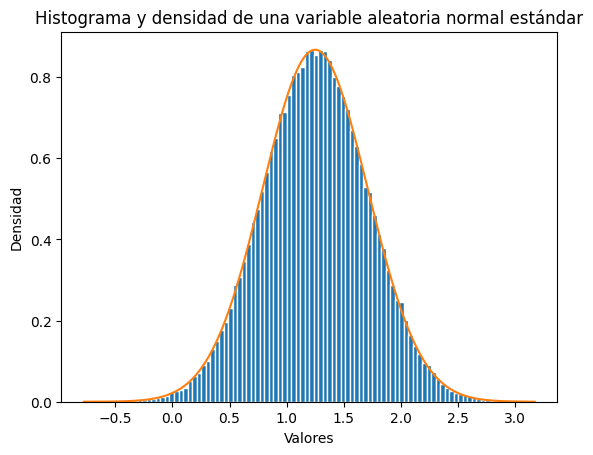

la probabilidad para cuando P(1.00<Z<1.75) es igual a: 0.5680717101573987


In [7]:
np.random.seed(123)
tamaño_simul=100000
sigma=.46
media=1.25
y = np.random.normal(loc=media, scale=sigma, size=tamaño_simul)
# Ordeno el array
y.sort()
fy=stats.norm.pdf(y, loc=media, scale=sigma)

plt.hist(y, bins=100, edgecolor = "white", density=True)
plt.plot(y, fy)
plt.ylabel('Densidad')
plt.xlabel('Valores')
plt.title('Histograma y densidad de una variable aleatoria normal estándar')
plt.show()

#ADVERTENCIA!!! todavía no encontré como eniar los parametros automaticamente por lo que se cargan a mano :/
def funcion_densidad(y):
    media=1.25
    sigma=0.46
    return stats.norm.pdf(y, loc=media, scale=sigma)

pregunta_a, _ = quad(funcion_densidad, 1, 1.75)
print(f"la probabilidad para cuando P(1.00<Z<1.75) es igual a: {pregunta_a}")



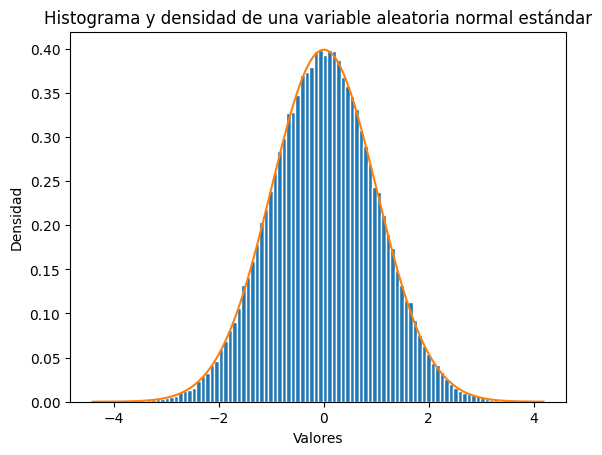

la probabilidad para cuando P(-.54<Z<1.08) es igual a: 0.5653303936955331


In [8]:
np.random.seed(123)
tamaño_simul=100000
sigma=1
media=0
y = np.random.normal(loc=media, scale=sigma, size=tamaño_simul)
# Ordeno el array
y.sort()
fy=stats.norm.pdf(y, loc=media, scale=sigma)

plt.hist(y, bins=100, edgecolor = "white", density=True)
plt.plot(y, fy)
plt.ylabel('Densidad')
plt.xlabel('Valores')
plt.title('Histograma y densidad de una variable aleatoria normal estándar')
plt.show()

#ADVERTENCIA!!! todavía no encontré como eniar los parametros automaticamente por lo que se cargan a mano :/
def funcion_densidad(y):
    media=0
    sigma=1
    return stats.norm.pdf(y, loc=media, scale=sigma)

pregunta_a, _ = quad(funcion_densidad, -0.54, 1.08)
print(f"la probabilidad para cuando P(-.54<Z<1.08) es igual a: {pregunta_a}")

Ejercicio 4.17 página 158

Se sabe que el voltaje de ruptura de un diodo seleccionado al azar de un tipo particular está
normalmente distribuido. 

¿Cuál es la probabilidad de que el voltaje de ruptura de un diodo esté dentro de 1 desviación estándar de su valor medio? 

Esta pregunta puede ser respondida sin conocer o , en tanto se sepa que la distribución es normal; la respuesta es la misma para cualquier distribución normal:

Si es normal 

sigma=1
media=0

entonces la ecuación es buscar la probabilidad del rango -1<Z>1

b)La probabilidad de que X esté dentro de 2 desviaciones estándar de su media

c)La probabilidad de que X esté dentro de 3 desviaciones estándar de su media


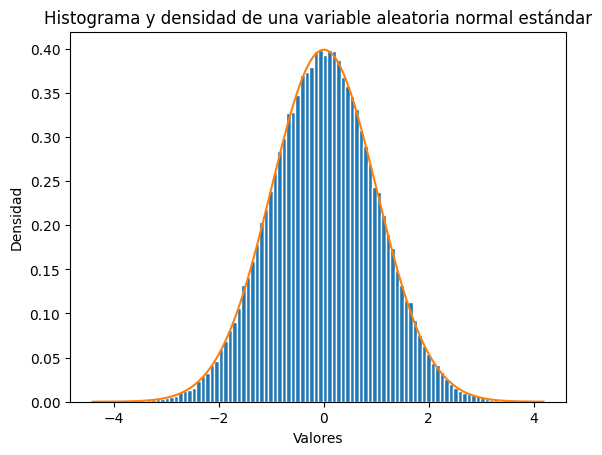

la probabilidad para cuando P(-1.00<Z<1.00) es igual a: 0.682689492137086
la probabilidad para cuando P(-2.00<Z<2.00) es igual a: 0.9544997361036417
la probabilidad para cuando P(-3.00<Z<3.00) es igual a: 0.9973002039367399


In [9]:
np.random.seed(123)
tamaño_simul=100000
sigma=1
media=0
y = np.random.normal(loc=media, scale=sigma, size=tamaño_simul)
# Ordeno el array
y.sort()
fy=stats.norm.pdf(y, loc=media, scale=sigma)

plt.hist(y, bins=100, edgecolor = "white", density=True)
plt.plot(y, fy)
plt.ylabel('Densidad')
plt.xlabel('Valores')
plt.title('Histograma y densidad de una variable aleatoria normal estándar')
plt.show()


#ADVERTENCIA!!! todavía no encontré como eniar los parametros automaticamente por lo que se cargan a mano :/
def funcion_densidad(y):
    sigma=1
    media=0
    return stats.norm.pdf(y, loc=media, scale=sigma)

pregunta_a, _ = quad(funcion_densidad, -1, 1)
print(f"la probabilidad para cuando P(-1.00<Z<1.00) es igual a: {pregunta_a}")

pregunta_b, _ = quad(funcion_densidad, -2, 2)
print(f"la probabilidad para cuando P(-2.00<Z<2.00) es igual a: {pregunta_b}")

pregunta_c, _ = quad(funcion_densidad, -3, 3)
print(f"la probabilidad para cuando P(-3.00<Z<3.00) es igual a: {pregunta_c}")

Ejemplo 4.23 página169

Suponga que el tiempo de reacción X de un individuo seleccionado al azar a un estímulo
tiene una distribución gamma estándar con alfa=2.

la gama estandar tiene beta=1 

a)La probabilidad de que el tiempo de reacción sea entre 3s y 5s

b)La probabilidad de que el tiempo de reacción sea de más de 4 s es

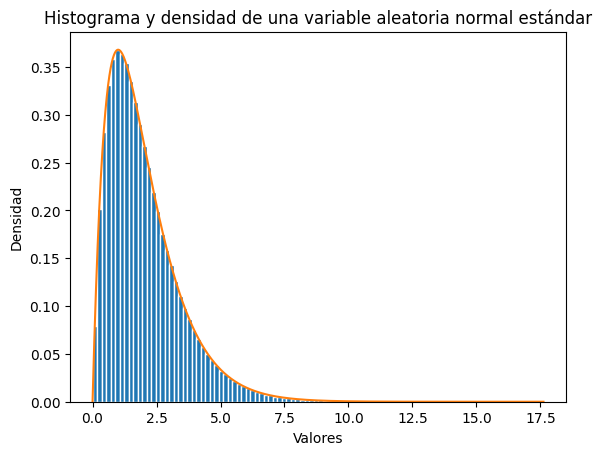

la probabilidad para cuando P(3<Z<5) es igual a: 0.15872059147694295
la probabilidad para cuando P(z>=4) es igual a: 0.09157819444367088


In [10]:
np.random.seed(123)
tamaño_simul=1000000
alfa=2
beta=1
y = np.random.gamma(shape=alfa,scale=beta, size=tamaño_simul)
# Ordeno el array
y.sort()
fy=stats.gamma.pdf(y,alfa)

plt.hist(y, bins=100, edgecolor = "white", density=True)
plt.plot(y, fy)
plt.ylabel('Densidad')
plt.xlabel('Valores')
plt.title('Histograma y densidad de una variable aleatoria normal estándar')
plt.show()


#ADVERTENCIA!!! todavía no encontré como eniar los parametros automaticamente por lo que se cargan a mano :/
def funcion_densidad(y):
    alfa=2
    return stats.gamma.pdf(y,alfa)

pregunta_a, _ = quad(funcion_densidad, 3, 5)
print(f"la probabilidad para cuando P(3<Z<5) es igual a: {pregunta_a}")

pregunta_b, _ = quad(funcion_densidad, 4, np.inf)
print(f"la probabilidad para cuando P(z>=4) es igual a: {pregunta_b}")



Ejemplo 4.24 página169

Suponga que el tiempo de sobrevivencia X en semanas de un ratón macho seleccionado al
azar expuesto a 240 rads de radiación gamma tiene una distribución gamma con alfa = 8 y
beta= 15. (Datos en Survival Distributions: Reliability Applications in the Biomedical
Services, de A. J. Gross y V. Clark, sugiere alfa aprox a 8.5 y beta aprox 13.3) 

a)La probabilidad de que un ratón sobreviva entre 60 y 120 semanas es:

b) La probabilidad de que un ratón sobreviva por lo menos 30 semanas es:

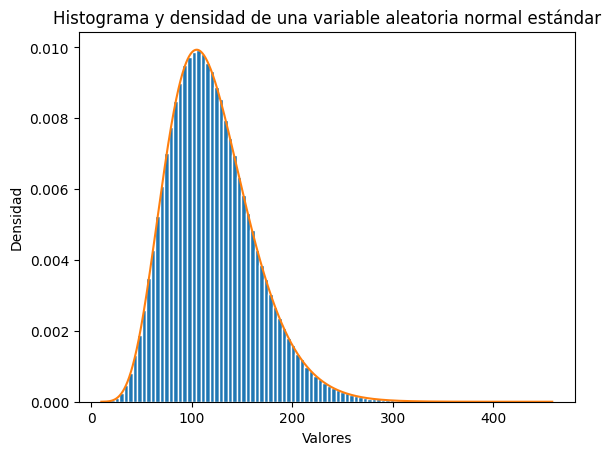

la esperanza de vida del ratón es la mediade la función= 119.99963084148183
el desvio de vida del ratón es la mediade la función= 42.40100666769099
la probabilidad para cuando P(60<Z<120) es igual a: 0.49590557472015806
la probabilidad para cuando P(z>=30) es igual a: 0.9989032810321405


In [11]:
np.random.seed(123)
tamaño_simul=1000000
alfa=8
beta=15
y = np.random.gamma(alfa,beta, size=tamaño_simul)
# Ordeno el array
y.sort()
fy=stats.gamma.pdf(y,alfa,scale=beta)

plt.hist(y, bins=100, edgecolor = "white", density=True)
plt.plot(y, fy)
plt.ylabel('Densidad')
plt.xlabel('Valores')
plt.title('Histograma y densidad de una variable aleatoria normal estándar')
plt.show()


#ADVERTENCIA!!! todavía no encontré como eniar los parametros automaticamente por lo que se cargan a mano :/
def funcion_densidad(y):
    alfa=8
    beta=15
    return stats.gamma.pdf(y,alfa,scale=beta)
print(f"la esperanza de vida del ratón es la mediade la función= {y.mean()}")
print(f"el desvio de vida del ratón es la mediade la función= {y.var()**.5}")
pregunta_a, _ = quad(funcion_densidad, 60, 120)
print(f"la probabilidad para cuando P(60<Z<120) es igual a: {pregunta_a}")

pregunta_b, _ = quad(funcion_densidad, 30, np.inf)
print(f"la probabilidad para cuando P(z>=30) es igual a: {pregunta_b}")
